In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

wine = pd.read_csv('https://s3.us-east-1.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/1613254703__modified_wine.csv')
df = wine[['malic_acid', 'flavanoids']]

df.head()

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


In [ ]:
# Instantiate Standard Scaler:

scaler = StandardScaler()

# Fit and transform the data:

scaleddf = scaler.fit_transform(df)

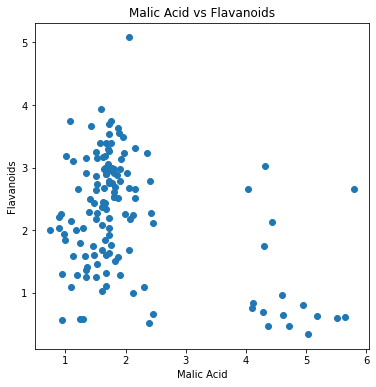

In [ ]:
# Visualization of Data Frame:
figs, axes = plt.subplots(nrows =1, ncols =1, figsize = (6,6));
plt.scatter(df['malic_acid'], df['flavanoids']);
plt.xlabel('Malic Acid');
plt.ylabel('Flavanoids');
plt.title('Malic Acid vs Flavanoids');

In [ ]:
# From the graph there appear to be two clusters:

KM = KMeans(n_clusters = 2)
KM.fit(scaleddf)


KMeans(n_clusters=2)

In [ ]:
# New feature / column denoting the cluster values:

df['cluster'] = KM.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


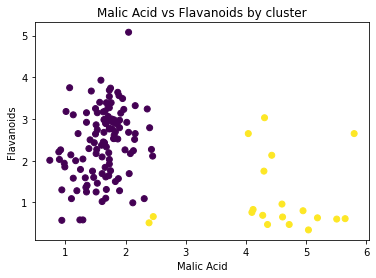

In [ ]:
# Visualization:

plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster']);
plt.xlabel('Malic Acid');
plt.ylabel('Flavanoids');
plt.title('Malic Acid vs Flavanoids by cluster');

### **Hierarchical Clustering**

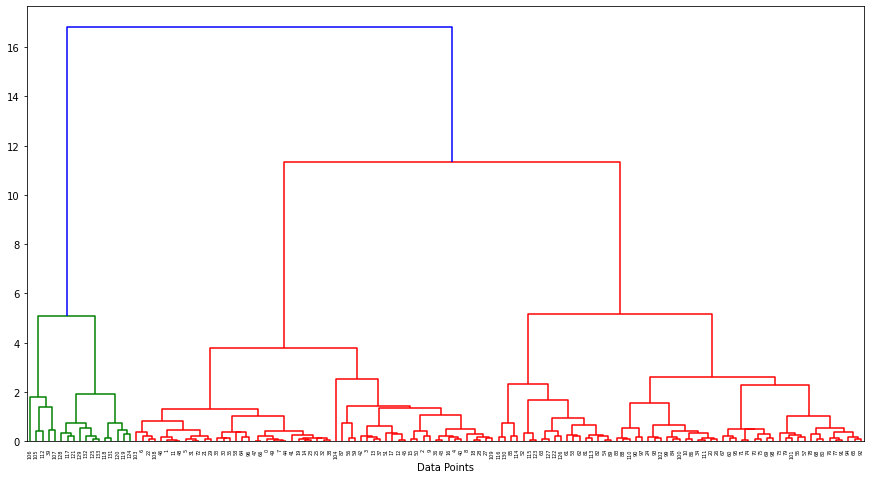

In [ ]:
# Dendrogram to visually determine the number of clusters for our dataset:

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,8))
sch.dendrogram(sch.linkage(scaleddf, method = 'ward'))
plt.xlabel('Data Points');

The diagram has its longest verital legs or branches beten 5 and 11. A hortizontal line between 5 and 11 would cross the vertical lines of the dendrogram in three places indicating that we should use 3 clusters for our model.

In [ ]:
# Revised model with 3 clusters: 

KM3 = KMeans(n_clusters = 3)
KM3.fit(scaleddf)


KMeans(n_clusters=3)

### **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

In [ ]:
from sklearn.cluster import DBSCAN

# Instantiation & fit of DB scan algorithmn can be done in a single step:

DBSC = DBSCAN(eps = 0.5, min_samples = 5).fit(scaleddf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


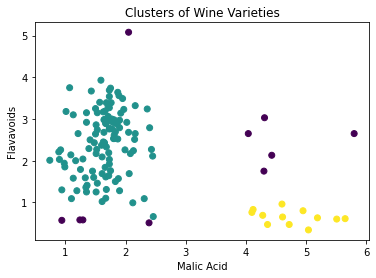

In [ ]:
# Add cluster labels to the dataframe

df['cluster'] = DBSC.labels_

# Graph results to visualize 

plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavavoids')
plt.title('Clusters of Wine Varieties');